In [1]:
!pip install yfinance scikit-learn matplotlib


In [3]:
import yfinance as yf
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [4]:
# Get stock data for Apple (AAPL)
data = yf.download('AAPL', start='2020-01-01', end='2024-12-31')
prices = data['Close']
prices.tail()


/tmp/ipython-input-4-4028767040.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('AAPL', start='2020-01-01', end='2024-12-31')
[*********************100%***********************]  1 of 1 completed


Ticker,AAPL
Date,
2024-12-23,254.655716
2024-12-24,257.578674
2024-12-26,258.396667
2024-12-27,254.974930
2024-12-30,251.593079


In [6]:
# Use today's price to predict next day's price
X = np.array(prices[:-1]).reshape(-1, 1)  # Today's price
y = np.array(prices[1:]).reshape(-1, 1)   # Tomorrow's price


In [7]:
model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [14]:
X_input = np.array([latest_price]).reshape(-1, 1)
predicted_price = model.predict(X_input)


print(f"Predicted Tomorrow’s Price: ${predicted_price[0][0]:.2f}")



Predicted Tomorrow’s Price: $251.62


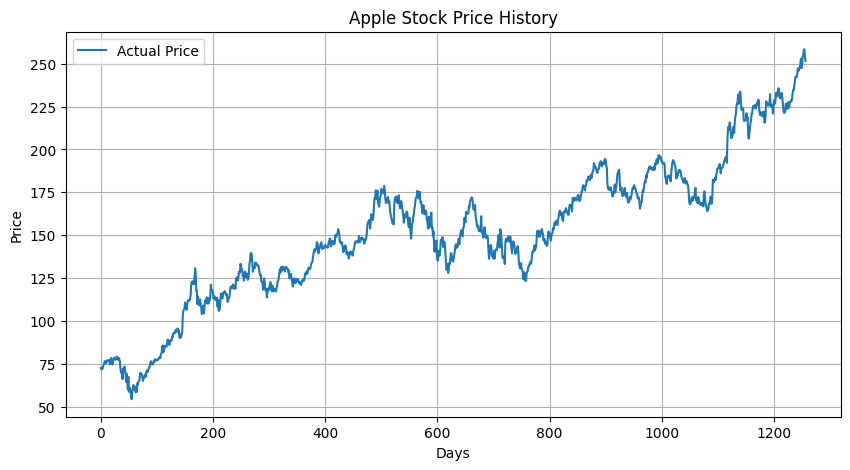

In [15]:
plt.figure(figsize=(10,5))
plt.plot(prices.values, label='Actual Price')
plt.title("Apple Stock Price History")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()


In [16]:
# Prepare features and labels again
X = np.array(prices[:-1]).reshape(-1, 1)   # Today's price
y = np.array(prices[1:]).reshape(-1, 1)    # Tomorrow's price

# Predict on entire dataset
y_pred = model.predict(X)

# Show first 5 predictions vs actual
for i in range(5):
    actual = y[i][0]
    predicted = y_pred[i][0]
    print(f"Actual: ${actual:.2f} | Predicted: ${predicted:.2f}")


Actual: $71.91 | Predicted: $72.86
Actual: $72.49 | Predicted: $72.15
Actual: $72.15 | Predicted: $72.72
Actual: $73.31 | Predicted: $72.38
Actual: $74.86 | Predicted: $73.54


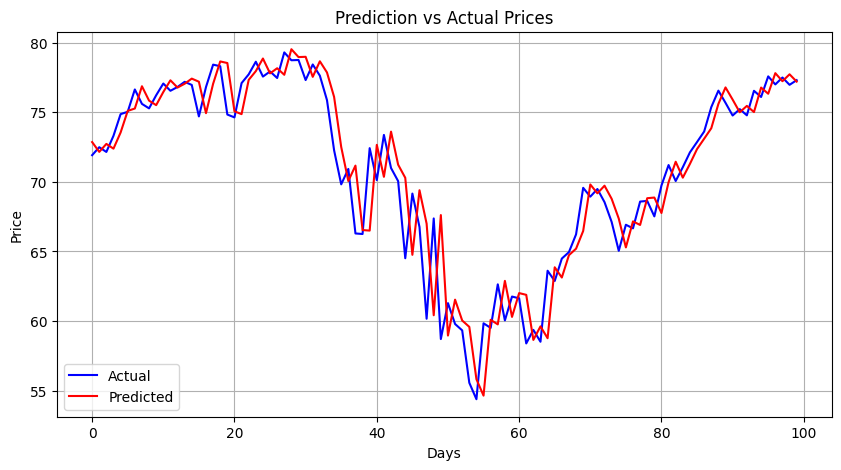

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(y[:100], label="Actual", color='blue')       # first 100 real prices
plt.plot(y_pred[:100], label="Predicted", color='red') # first 100 predicted prices
plt.title("Prediction vs Actual Prices")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


In [22]:
future_prices = []

# Safely extract last price as float
current_price = prices.iloc[-1].item()

for _ in range(7):
    # Reshape input correctly
    X_input = np.array([[current_price]])  # shape (1, 1)

    # Predict and extract the float value using .item()
    next_price = model.predict(X_input).item()

    # Append to list
    future_prices.append(next_price)

    # Update current_price for next iteration
    current_price = next_price

# Display predictions
print("Next 7 Days Stock Price Prediction:")
for i, price in enumerate(future_prices, 1):
    print(f"Day {i}: ${price:.2f}")


Next 7 Days Stock Price Prediction:
Day 1: $251.62
Day 2: $251.64
Day 3: $251.67
Day 4: $251.69
Day 5: $251.71
Day 6: $251.74
Day 7: $251.76
